In [9]:
import matplotlib.pyplot as plt
import networkx as nx 
import numpy as np
import os

from tqdm import tqdm

import severability
from severability.plotting import plot_pie_graph

# Multiscale severability applied to Zachary's Karate Club graph

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


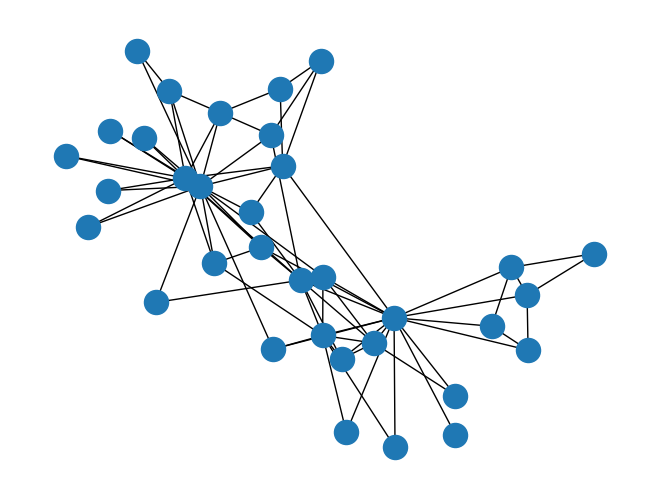

In [10]:
# get Karate Club graph
G = nx.karate_club_graph()
print(G)
nx.draw(G)

In [11]:
# get adjacency matrix and convert to np.matrix
A = nx.to_numpy_array(G)
A = np.matrix(A)

# compute transition matrix
P = severability.transition_matrix(A)

In [12]:
# run multiscale severability
sev_results = severability.multiscale_severability(P, 20, n_tries=5, n_rand=5, n_workers=5)

Optimise severability ...


100%|████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.53it/s]


Compute 1-Rand(t) ...


100%|██████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 1377.15it/s]

Compute 1-Rand(t,t') ...


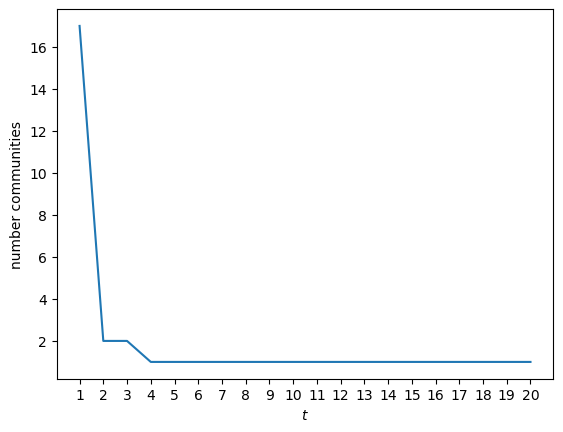

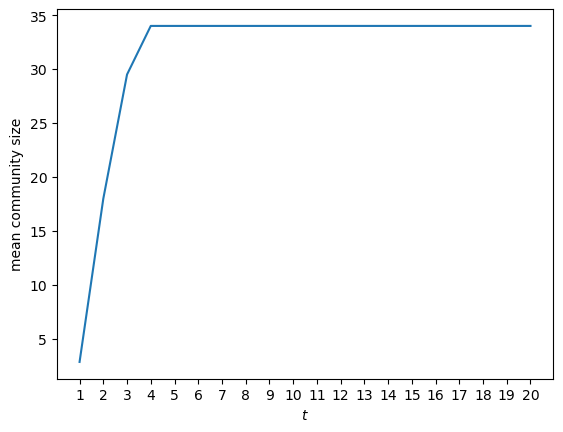

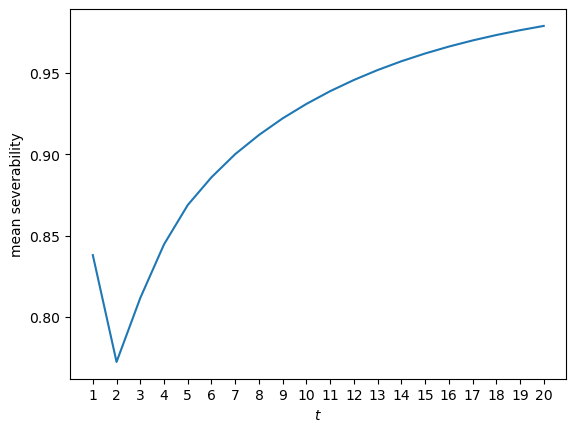

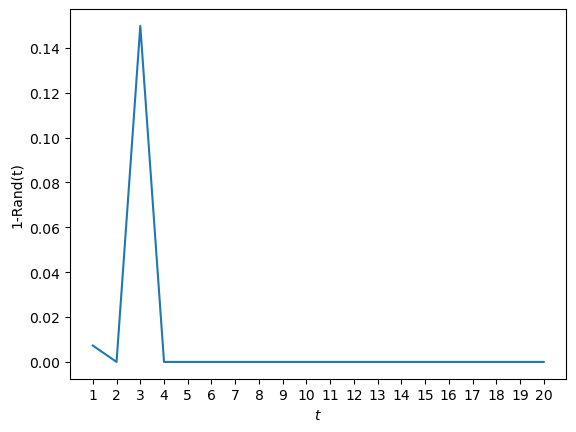

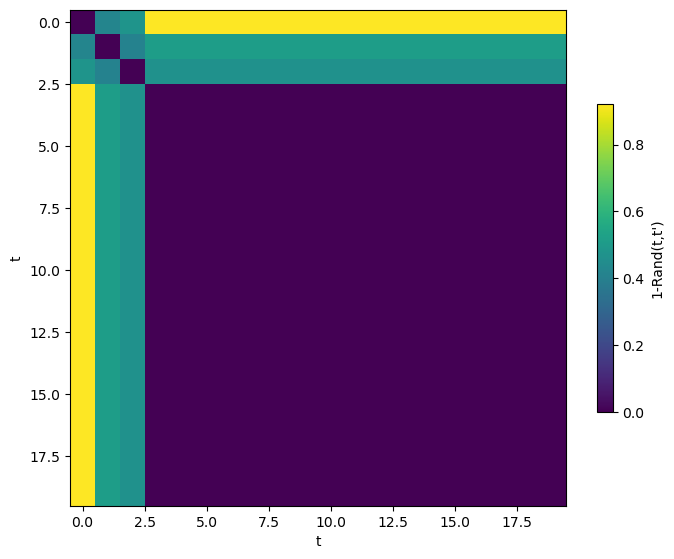

In [13]:
scales = sev_results["scales"]
n_communities = sev_results["n_communities"]
s_communities = sev_results["mean_size"]
mean_severabilities = sev_results["mean_sev"]
rand_t = sev_results["rand_t"]
rand_ttprime = sev_results["rand_ttprime"]

fig, ax = plt.subplots(1)
ax.plot(scales,n_communities)
ax.set(xlabel="$t$", ylabel="number communities",xticks=scales)
plt.show()


fig, ax = plt.subplots(1)
ax.plot(scales,s_communities)
ax.set(xlabel="$t$", ylabel="mean community size",xticks=scales)
plt.show()

fig, ax = plt.subplots(1)
ax.plot(scales,mean_severabilities)
ax.set(xlabel="$t$", ylabel="mean severability",xticks=scales)
plt.show()

fig, ax = plt.subplots(1)
ax.plot(scales,rand_t)
ax.set(xlabel="$t$", ylabel="1-Rand(t)",xticks=scales)
plt.show()

plt.figure(figsize = (8,8))
plt.imshow(rand_ttprime)
plt.colorbar(label = "1-Rand(t,t')", shrink=0.5)
plt.xlabel("t")
plt.ylabel("t")
plt.show()

In [14]:
# create the pie chart graph visualisation

In [15]:
partitions = sev_results['partitions']

partition_to_plot = partitions[2]

n_nodes = len(A)

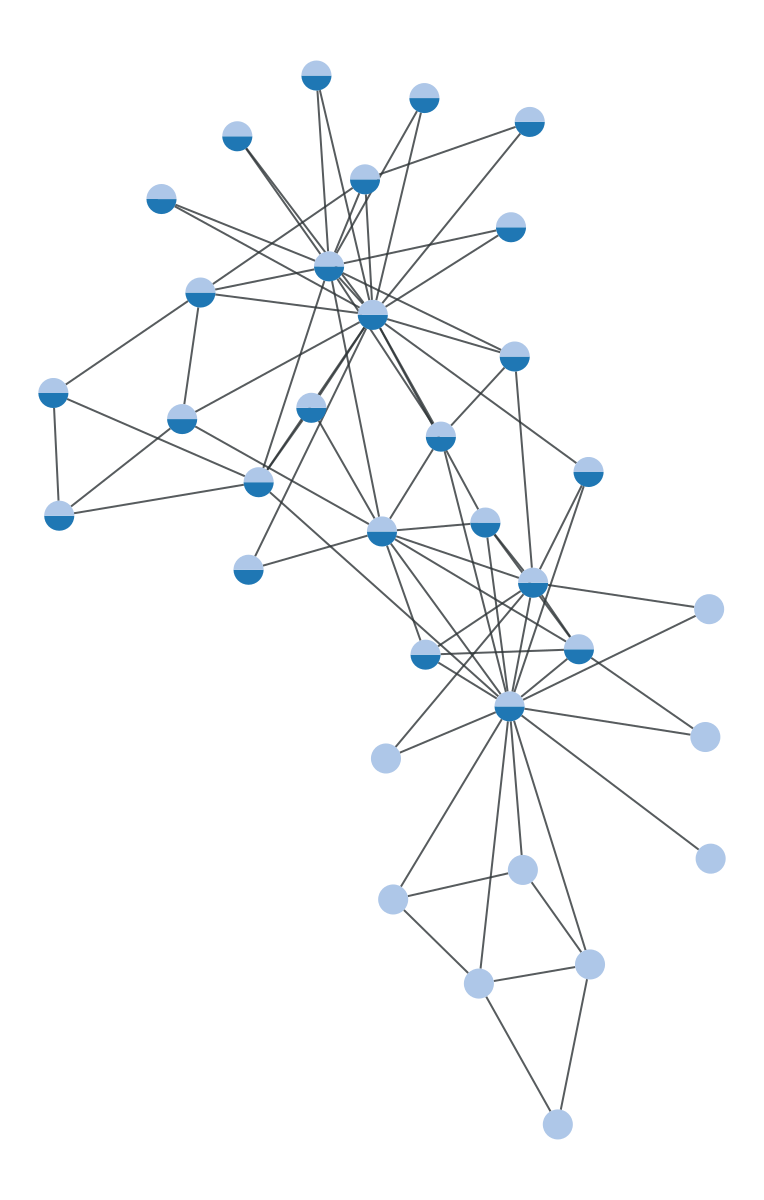

In [17]:
plot_pie_graph(partition_to_plot, A, n_nodes)